## Section 1, Part A

In [48]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib.table import table
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import re
import tabulate
from sympy import true

tweet_data = pd.read_csv("training_data.csv")
print(tweet_data.head())
print (tweet_data.columns)
#print(np.mean(tweet_data['retweet_count']))

   favorite_count                                          full_text  \
0               8  b'WATCH my speech on the @SenateFloor to learn...   
1               2  b'Boehner delays leadership races. Only speake...   
2               5  b"I'll be sharing #scarynumbers about #governm...   
3              34  b"#OTD in '64, LBJ took important step towards...   
4              23  b'My bipartisan bill is a step toward protecti...   

                          hashtags  retweet_count  year  dim1_nominate  \
0                PatientFreedomAct              3  2017       0.243962   
1              rossformajoritywhip              3  2015       0.561728   
2  scarynumbers governmentspending              4  2014       0.513246   
3                              OTD             14  2017      -0.241932   
4                             VA07              7  2020      -0.225722   

   dim2_nominate  
0       0.170366  
1       0.089540  
2      -0.224541  
3       0.097843  
4       0.329999  
Index(['

(a) Create a table that contains information on minimum, average, median, and maximum for the
following: tweet length (#characters and #words) (text column), hashtag length (#characters and
#words) (hashtags column) (Add your table to the report.) (4 points) (2 points for graduate
students)

In [2]:
# The one without links and hashtag will be written in partB
# remove "b' or b" and ' or " at the end

df = pd.read_csv("training_data.csv")
df["full_text_decoded"] = df["full_text"].astype(str).str.replace(r'^b["\']', '', regex=True).str.replace(r'["\']$', '', regex=True)
#counting full text words and characters
df["full_text_decoded_char_length"] = df["full_text_decoded"].str.len()
df["full_text_decoded_word_length"] = df["full_text_decoded"].str.split().str.len()
#counting hashtags words and characters
df["hashtags_char_length"] = df["hashtags"].astype(str).str.len()
df["hashtags_word_length"] = df["hashtags"].astype(str).str.split().str.len()
#summary table
summary_table = df[["full_text_decoded_char_length", "full_text_decoded_word_length","hashtags_char_length","hashtags_word_length"]].agg(["min","max","mean","median"])
#rename col name
summary_table = summary_table.rename(columns={
    "full_text_decoded_char_length": "Tweets Character Length",
    "full_text_decoded_word_length": "Tweets Word Length",
    "hashtags_char_length": "Hashtags Character Length",
    "hashtags_word_length": "Hashtags Word Length"
})
#print summary table
summary_table = summary_table.transpose()
summary_table

,min,max,mean,median
Tweets Character Length,4.0,2434.0,180.176139,151.0
Tweets Word Length,1.0,61.0,24.885511,21.0
Hashtags Character Length,1.0,184.0,14.536123,12.0
Hashtags Word Length,1.0,17.0,1.491980,1.0


b) Find the top ten most commonly used hashtags (hashtags column). Then, create a bar chart which show the count values of these ten most commonly used hashtags. Do you observe any patterns? What are the meanings / interpretations of the hashtags you have identified? Write your findings in the report. (Add the bar chart to the report.) (4 points) (2 points for graduate students)

[('COVID19', 4870), ('SOTU', 2901), ('Obamacare', 2182), ('coronavirus', 1524), ('utpol', 1387), ('GOPTaxScam', 1349), ('TaxReform', 1248), ('ProtectOurCare', 1237), ('IA03', 1214), ('ForThePeople', 1085)]


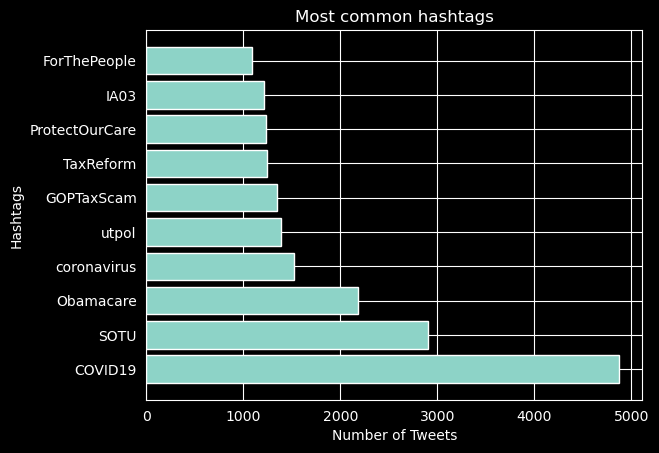

In [3]:
a = Counter(tweet_data['hashtags']).most_common(10)
hashtags = list()
hastagnums = list()
print(a)
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

- Big events like the State of the Union, hot-button issues like Obamacare or the pandemic attract the most attention

c) To answer this question, first please read the description above DW-NOMINATE scores provided
at the beginning of this assignment document. Then, please divide your training dataset into four
subsets by focusing on the following ideological dimensions:

a. Group 1: Dim 1 (0 to 1), Dim 2 (0 to 1)

b. Group 2: Dim 1 (0 to 1), Dim 2 (0 to -1)

c. Group 3: Dim 1 (0 to -1), Dim 2 (0 to 1)

d. Group 4: Dim 1 (0 to -1), Dim 2) (0 to -1)

In [4]:
group1 = tweet_data[(tweet_data['dim1_nominate'] > 0) & (tweet_data['dim2_nominate'] > 0)]
group2 = tweet_data[(tweet_data['dim1_nominate'] > 0) & (tweet_data['dim2_nominate'] <= 0)]
group3 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & (tweet_data['dim2_nominate'] > 0)]
group4 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & (tweet_data['dim2_nominate'] <= 0)]



[('Obamacare', 1440), ('SOTU', 1200), ('COVID19', 1126), ('TaxReform', 922), ('MS01', 888), ('utpol', 828), ('taxreform', 698), ('USMCA', 620), ('AR3', 517), ('tcot', 494)]


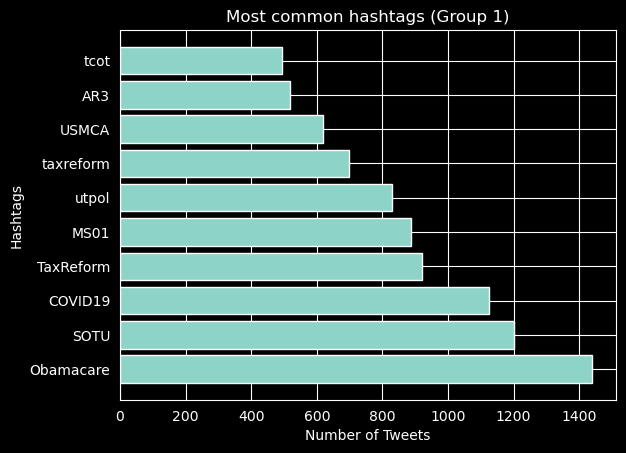

In [5]:
#Group 1 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to 1)
a = Counter(group1['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 1)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('IA03', 1078), ('SouthJersey', 754), ('COVID19', 665), ('Obamacare', 624), ('NY22', 601), ('SOTU', 577), ('VA05', 446), ('NY24', 392), ('coronavirus', 353), ('TaxReform', 277)]


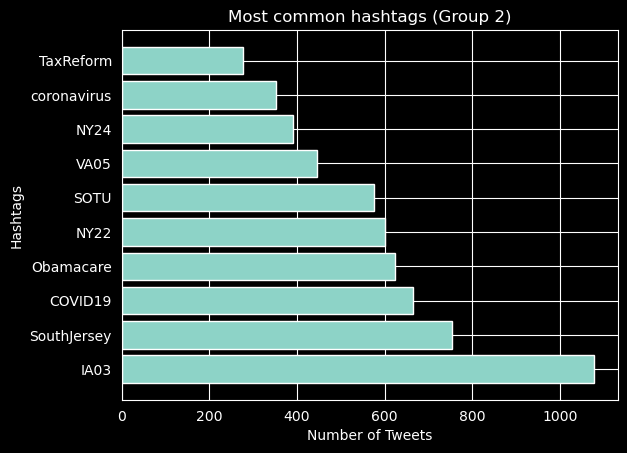

In [6]:
#Group 2 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to -1)

a = Counter(group2['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 2)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 1531), ('VA07', 603), ('mtpol', 544), ('ProtectOurCare', 417), ('ForThePeople', 386), ('SOTU', 357), ('coronavirus', 349), ('GetCovered', 348), ('utpol', 344), ('IA01', 322)]


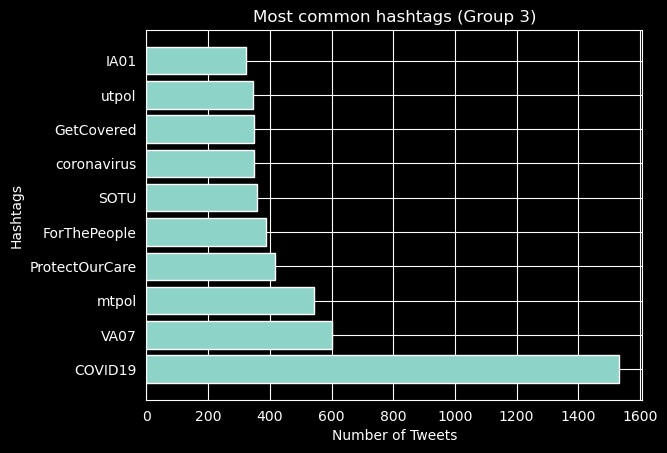

In [7]:
#Group 3 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to 1)

a = Counter(group3['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 3)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 1548), ('GOPTaxScam', 1139), ('ProtectOurCare', 820), ('SOTU', 767), ('ForThePeople', 698), ('Trumpcare', 684), ('GetCovered', 634), ('ACA', 611), ('ActOnClimate', 586), ('NetNeutrality', 584)]


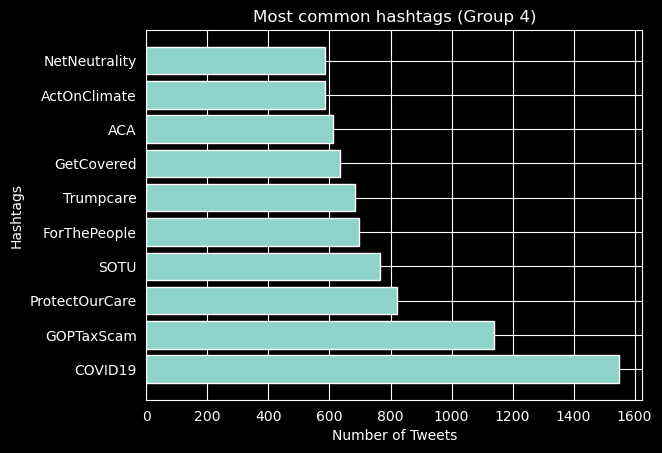

In [8]:
#Group 4 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to -1)

a = Counter(group4['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 4)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

d) Divide the training dataset into two along the 1st dimension. All observations that have a value
bigger than zero (in the 1st dimension) should be designated as ‘conservative’, all other
observations should be designed as ‘liberal’. Create a ridge plot that shows the changes in these
values (1st dimension) through the years for two different ideological groups. Color the
conservative group as red, color the liberal group as blue.

0
13
1
13
2
13
3
13
4
13
5
13
6
13
7
13
8
13
9
13
10
13
11
13
12
13


/tmp/ipykernel_14523/951364213.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


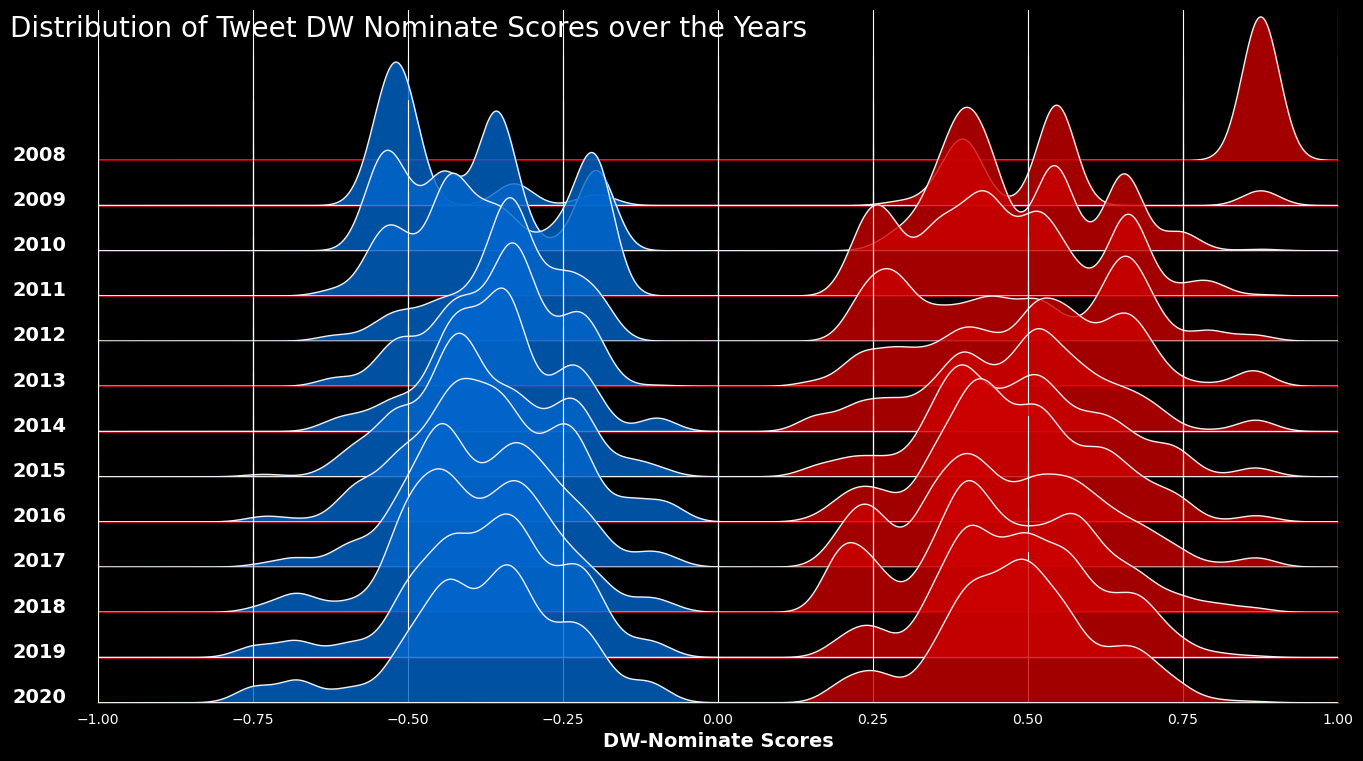

In [9]:
# ridge plot code modified from: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
conservative = tweet_data[tweet_data['dim1_nominate'] > 0]
liberal = tweet_data[tweet_data['dim1_nominate'] <= 0]


years = sorted(tweet_data['year'].unique())

gs = grid_spec.GridSpec(len(years),1)
fig = plt.figure(figsize=(16,9))

i = 0

color_lib = '#0066cc'
color_con = '#cc0000'

ax_objs = []
for y in years:
    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    #LIBERAL
    x_lib = np.array(liberal[liberal.year == y].dim1_nominate)
    if(len(x_lib > 1)):
        x_d_lib = np.linspace(-1,1, 1000)
        kde_lib = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_lib.fit(x_lib[:, None])
        logprob_lib = kde_lib.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_lib, np.exp(logprob_lib),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_lib, np.exp(logprob_lib), alpha=0.8,color=color_lib)


    #CONSERVATIVE
    x_con = np.array(conservative[conservative.year == y].dim1_nominate)
    if(len(x_con > 1)):
        x_d_con = np.linspace(-1,1, 1000)
        kde_con = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_con.fit(x_con[:, None])
        logprob_con = kde_con.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_con, np.exp(logprob_con),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_con, np.exp(logprob_con), alpha=0.8,color=color_con)



    # setting uniform x and y lims
    ax_objs[-1].set_xlim(-1,1)
    ax_objs[-1].set_ylim(0,None)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticks([])

    if i == len(years)-1:
        ax_objs[-1].set_xlabel("DW-Nominate Scores", fontsize=14,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    print(i)
    print(len(years))
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    y = str(y)
    adj_year = y.replace(" ","\n")
    ax_objs[-1].text(-1.05,0,adj_year,fontweight="bold",fontsize=14,ha="right")

    i += 1



gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Tweet DW Nominate Scores over the Years",fontsize=20)

plt.tight_layout()
plt.show()


Finally, find the top-10 tweets that are ideologically most different from each other by calculating
the Euclidean distances for the following:

a. Top-10 most distant tweets along both dimensions

b. Top-10 most distant tweets along the 1st dimension

c. Top-10 most distant tweets along the 2nd dimension

Please report your findings in the form of tables [tweet pairs that are ideologically distant and the
distance value]. Do you observe any patterns? Please explain. Write your findings in the report.
(Add the tables to the report.)

In [10]:
# Handling part b and c first, since it's actually easier that way:

#B - most distant along 1st dim.
sorted_dim1 = tweet_data.sort_values('dim1_nominate')

head = sorted_dim1.head(10)
tail = sorted_dim1.tail(10)
head = head.sort_values('dim1_nominate', ascending=True)
tail = tail.sort_values('dim1_nominate', ascending=False)
newcol = []
for col in tail.columns:
    newcol.append(col + "_1")
tail.columns = newcol


head['index'] = range(0,10)
tail['index'] = range(0,10)
head['full_text'] = head['full_text'].str.replace('|', '')
tail['full_text_1'] = tail['full_text_1'].str.replace('|', '')

#print(head['dim1_nominate'])
#print(tail['dim1_nominate'])
#print(head.columns)
table = pd.merge(head, tail)
table.drop(['hashtags', 'favorite_count', 'hashtags_1', 'favorite_count_1'], axis=1, inplace=True)

table['distance'] = abs(table['dim1_nominate']) + abs(table['dim1_nominate_1'])
table.style.highlight_max(axis=1)

print(table.to_markdown())





|    | full_text                                                                                                                                                                                                                                                                                                                                                                  |   retweet_count |   year |   dim1_nominate |   dim2_nominate |   index | full_text_1                                                                                                                                                                                                                                    |   retweet_count_1 |   year_1 |   dim1_nominate_1 |   dim2_nominate_1 |   distance |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|    | full_text                                                                                                                                                                                                                                                                                                                                                                  |   retweet_count |   year |   dim1_nominate |   dim2_nominate |   index | full_text_1                                                                                                                                                                                                                                    |   retweet_count_1 |   year_1 |   dim1_nominate_1 |   dim2_nominate_1 |   distance |
|---:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------:|-------:|----------------:|----------------:|--------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|---------:|------------------:|------------------:|-----------:|
|  0 | b'Hoy es el #DiaDelNi\xc3\xb1o y es muy importante que todos los ni\xc3\xb1os sean contados en el #Censo2020.\n\nVaya a https://t.co/b3txdbbQzi, llame al 844-468-2020 o complete y env\xc3\xade su formulario del Censo.\n\nEsta es una actividad divertida para hacer con sus hijos! #HazmeContar https://t.co/PqvYyyzym5'                                               |               4 |   2020 |        -0.75099 |        0.489954 |       0 | b'Clear example of how #Obamacare will harm businesses + employees in AZ via @BrahmResnik @12news: http://t.co/EIwZjXNuCy'                                                                                                                     |                19 |     2013 |          0.875556 |         -0.544445 |    1.62655 |
|  1 | b'We have a responsibility to keep families in their homes as we continue to tackle the ongoing economic and health crisis caused by #COVID19. https://t.co/MNduA9sWpT'                                                                                                                                                                                                    |               3 |   2020 |        -0.75099 |        0.489954 |       1 | b'Good piece in @politico about #Obamacare. Problems much deeper than a poor website http://t.co/KDW7V1kmxA'                                                                                                                                   |                 4 |     2013 |          0.875556 |         -0.544445 |    1.62655 |
|  2 | b'.@HoustonTX launched its #Census2020 YES! to the Census campaign because everyone must be counted.\n\nThe Census will determine how billions in federal funds will be allocated across the country.\n\nWe must make sure our community gets its fair share. https://t.co/5buMKb3WLw'                                                                                     |              15 |   2020 |        -0.75099 |        0.489954 |       2 | b'.@POTUS making effective case for free trade and #TPP. Hope @realDonaldTrump and @HillaryClinton are listening'                                                                                                                              |                41 |     2016 |          0.875556 |         -0.544445 |    1.62655 |
|  3 | b'A year ago today, @HouseDemocrats passed the #DreamAndPromiseAct.\n\nIt\xe2\x80\x99s time for the Senate to pass this bill to ensure #Dreamers are protected under the law.\n\nDreamers are here to stay because their #HomeIsHere.\n\nRead my full statement below: https://t.co/VWNlxjlIKd'                                                                            |              27 |   2020 |        -0.75099 |        0.489954 |       3 | b"I'm voting yes on #Prop123. Our kids attend public schools, and it's the best way to provide additional resources with no tax increase."                                                                                                     |                24 |     2016 |          0.875556 |         -0.544445 |    1.62655 |
|  4 | b'Proud to be joining some of my colleagues from the @HispanicCaucus \nas we advocate to improve Latino representation in the TV &amp; film industry. Our community can\xe2\x80\x99t be what it can\xe2\x80\x99t see. That\xe2\x80\x99s why we need greater Latino representation in the TV &amp; film industry! \xf0\x9f\x8e\xac #CHCtoHollywood https://t.co/N80VahOa1j' |               5 |   2019 |        -0.75099 |        0.489954 |       4 | b"Debate and passage of an #AUMF against #ISIL like the bipartisan proposal @timkaine &amp; I intro'd is long overdue https://t.co/OS9A7j9kQP"                                                                                                 |                21 |     2015 |          0.875556 |         -0.544445 |    1.62655 |
|  5 | b'Angie from #TeamSylvia attended the Houston Walk to End #Alzheimers and \npresented John Harris and Melissa Sanchez with Congressional Certificates for their advocacy to end Alzheimer\xe2\x80\x99s.\n\nIt was nice seeing @RepAlGreen in the crowd. Together we will one day #ENDALZ! #Walk2EndAlz https://t.co/tiP2AF1ggD'                                            |               7 |   2019 |        -0.75099 |        0.489954 |       5 | b'What do man caves, a secret agent &amp; pig flatulence have in common? @EPA &amp; your taxdollars #ScienceOfSplurging http://t.co/2gAKOMyS9A'                                                                                                |                 2 |     2014 |          0.875556 |         -0.544445 |    1.62655 |
|  6 | b'.@astros win Game 5! Just one game away from winning the #WorldSeries \n#TakeItBack https://t.co/GVISpBENqd'                                                                                                                                                                                                                                                             |               1 |   2019 |        -0.75099 |        0.489954 |       6 | b"I'm speaking on House floor soon opposing bailout. #pork"                                                                                                                                                                                    |                 0 |     2008 |          0.875556 |         -0.544445 |    1.62655 |
|  7 | b'Reminder: Join me and local experts tonight for a #coronavirus Tele-Townhall on the latest info on #COVID\xe3\x83\xbc19.\n\nThe English call will start at 6:30pm CST and the Spanish one at 7:30pm CST.\n\nJoin us by calling 855-710-6222 or listen to the live call at: https://t.co/DaK4a2uaYP https://t.co/8Qtle3NNts'                                              |              18 |   2020 |        -0.75099 |        0.489954 |       7 | b'Bigger waste of your taxes - $1.3M on alcohol or $34M on a facility the military won\xe2\x80\x99t use? #8ofWaste #FinalFour http://t.co/4fhXQnuCFv'                                                                                          |                 5 |     2014 |          0.875556 |         -0.544445 |    1.62655 |
|  8 | b'We have to work together to keep the money our delegation worked so hard to get stays dedicated to the real threats our region faces. #EndTheShutdown https://t.co/UyxUbnkOzb'                                                                                                                                                                                           |               2 |   2019 |        -0.75099 |        0.489954 |       8 | b'My joint statement with @ChrisCoons in response to reports that @POTUS plans to release the House Intelligence Committee #memo against the recommendation of the @TheJusticeDept &amp; @FBI https://t.co/Es8JsQjfbJ https://t.co/OsdWqbgS0H' |              2589 |     2018 |          0.875556 |         -0.544445 |    1.62655 |
|  9 | b"Check out our latest weekly update where we've highlighted some of the biggest events we held #ForThePeople in the district during recess! #TX29 https://t.co/259hFNzBpC"                                                                                                                                                                                                |               7 |   2019 |        -0.75099 |        0.489954 |       9 | b'Congratulations to @CAPArizona on the 20th anniversary of the Lake Pleasant Storage Reservoir #Time2TalkH20 https://t.co/vcRTNZmgCN'                                                                                                         |                 3 |     2014 |          0.875556 |         -0.544445 |    1.62655 |

In [11]:
#C - most distant along 2nd dim.

sorted_dim2 = tweet_data.sort_values('dim2_nominate')

head = sorted_dim2.head(10)
tail = sorted_dim2.tail(10)
head = head.sort_values('dim2_nominate', ascending=True)
tail = tail.sort_values('dim2_nominate', ascending=False)
newcol = []
for col in tail.columns:
    newcol.append(col + "_1")
tail.columns = newcol

head['index'] = range(0,10)
tail['index'] = range(0,10)
#print(head['dim1_nominate'])
#print(tail['dim1_nominate'])
#print(head.columns)
head['full_text'] = head['full_text'].str.replace('|', '')
tail['full_text_1'] = tail['full_text_1'].str.replace('|', '')

table = pd.merge(head, tail)
table.drop(['hashtags', 'favorite_count', 'hashtags_1', 'favorite_count_1'], axis=1, inplace=True)
table['distance'] = abs(table['dim2_nominate']) + abs(table['dim2_nominate_1'])
table.style.highlight_max(axis=1)

print(table.to_markdown())

|    | full_text                                                                                                                                                                                                                                                                                                                                                                |   retweet_count |   year |   dim1_nominate |   dim2_nominate |   index | full_text_1                                                                                                                                                                                                                                                                                                               |   retweet_count_1 |   year_1 |   dim1_nominate_1 |   dim2_nominate_1 |   distance |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------

|    | full_text                                                                                                                                                                                                                                                                                                                                                                |   retweet_count |   year |   dim1_nominate |   dim2_nominate |   index | full_text_1                                                                                                                                                                                                                                                                                                               |   retweet_count_1 |   year_1 |   dim1_nominate_1 |   dim2_nominate_1 |   distance |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------:|-------:|----------------:|----------------:|--------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|---------:|------------------:|------------------:|-----------:|
|  0 | b'Tonight, I\xe2\x80\x99ll be joining other policymakers, advocates &amp; experts to discuss the Emergency Action Plan: What is it, why do we need it, and how can you make it happen? How we respond to this #COVID19 crisis will determine the rest of our lives.\nRSVP now:  https://t.co/PSVIg0YqFL'                                                                 |              17 |   2020 |       -0.364929 |       -0.982897 |       0 | b'If we work together we can make real progress on important issues. This week, we did just that. The House passed bills that support veterans in #STEM careers, fund programs dedicated to Holocaust education and help @USAID ensure young girls abroad can access secondary education. https://t.co/zKL9Hr7Kc6'        |                15 |     2020 |         -0.472377 |          0.726593 |    1.70949 |
|  1 | b'@OversightDems @janschakowsky @JNJCares Johnson &amp; Johnson continues to put profits over people and it\xe2\x80\x99s past time they\xe2\x80\x99re held accountable. As Vice-Chair of the @OversightDems Subcommittee on Economic and Consumer Policy, I\xe2\x80\x99m committed to affirming #justice for all those whose lives were jeopardized by corporate greed.' |              11 |   2019 |       -0.364929 |       -0.982897 |       1 | b'Scientists from @UTSWNews, led by Dr. Trish Perl, who briefed North Texans on our tele-town halls, are warning that COVID-19 cases could spike by July. \n\nTo reopen safely, we must listen to the experts and all do our part to limit the spread. #StayHome https://t.co/FAV1Tmyi9b'                                 |                 2 |     2020 |         -0.472377 |          0.726593 |    1.70949 |
|  2 | b'Tune in to @NECNPrimary tonight at 7 to catch my conversation with @SueNBCBoston on the #impeachment inquiry, the Hyde Amendment, and my resolution to #ImpeachKavanaugh. https://t.co/JUOdELR8Ph'                                                                                                                                                                     |              27 |   2019 |       -0.364929 |       -0.982897 |       2 | b'Too often I hear heartbreaking stories about the high cost of prescription drugs, like Shane from Garland, who struggles to afford her insulin despite having a good-paying job. Today I told her story and urged action to #LowerDrugCosts and help folks facing crippling drug prices. https://t.co/8tLQ0cHgLv'       |                12 |     2019 |         -0.472377 |          0.726593 |    1.70949 |
|  3 | b"I'm proud to cosponsor the #NewDealforNewAmericans Act which will create visionary ways for refugees &amp; immigrants to settle in community. The Trump administration\xe2\x80\x99s xenophobic policies are inherently un-American. We must reaffirm our shared American values &amp; pass this legislation"                                                           |              48 |   2019 |       -0.364929 |       -0.982897 |       3 | b"Our government works #ForThePeople, and Inspectors General have a key role in oversight by ensuring any Administration follows our laws. \n\nThat\xe2\x80\x99s why I joined colleagues on @HouseForeign to get answers on why the State Department's top watchdog was fired. https://t.co/PZYpJQwXxt"                   |                 8 |     2020 |         -0.472377 |          0.726593 |    1.70949 |
|  4 | b'Nicholas Dworet, 17  #NeverAgain #ParklandStrong https://t.co/DcCpKZFoOr'                                                                                                                                                                                                                                                                                              |              90 |   2019 |       -0.364929 |       -0.982897 |       4 | b'To ensure that our communities get the resources and help they need, every North Texan should take time to fill out the #2020Census. In #TX32, 61% of residents have responded, so visit https://t.co/I7dVEs8Phb to complete yours today. https://t.co/mtSxno5QEi'                                                      |                 4 |     2020 |         -0.472377 |          0.726593 |    1.70949 |
|  5 | b'As we celebrate #Pride2019, we must continue to stand in opposition to this administration\xe2\x80\x99s war on #trans Americans. We will resist any and all attempts to rollback #ACA protections &amp; to legalize discrimination based on gender identity https://t.co/P2c8TdYsy6'                                                                                   |              24 |   2019 |       -0.364929 |       -0.982897 |       5 | b'Listening to constituents is one of the most important parts of our jobs as representatives, and it was great to answer questions and hear from folks at our bipartisan town hall in Ohio yesterday.\n\nThanks for having me and I look forward to hosting @RepAGonzalez in #TX32 soon! https://t.co/kkl3hkUF3h'        |                 3 |     2019 |         -0.472377 |          0.726593 |    1.70949 |
|  6 | b"41 years after the Pregnancy Discrimination Act, some people are still forced to choose between a paycheck and a healthy pregnancy. I'm proud to cosponsor the Pregnant Workers Fairness Act to affirm maternal justice &amp; #ProtectPregnantWorkers. #PDA41 https://t.co/IiT9fCD7QV"                                                                                 |              51 |   2019 |       -0.364929 |       -0.982897 |       6 | b'Calling all tech-savvy middle school and high school students! I\xe2\x80\x99m pleased to announce my office is hosting the Congressional App Challenge for #TX32! If you have an idea for an app, show off your coding skills by submitting it by Nov. 1st! More info: https://t.co/YqLA0lVptj https://t.co/rtYtEsqxVI' |                 5 |     2019 |         -0.472377 |          0.726593 |    1.70949 |
|  7 | b'What I saw at the border was horrifying, haunting, &amp; sobering. Our humanity is tied and we are collectively under attack - from El Paso to the Massachusetts 7th. I will never stop fighting for the dignity, the humanity, &amp; the preservation of immigrant families. #CloseTheCamps https://t.co/9ShfPK3S73'                                                  |            2553 |   2019 |       -0.364929 |       -0.982897 |       7 | b'This Thursday, my office is hosting mobile office hours in Garland! Visit the South Garland Branch Library from 2:30 PM - 4:30 PM to learn how we can assist with federal agencies or answer your questions about constituent services. #TX32 \n\nMore info here: https://t.co/Vg4n0rY3Zw'                              |                 0 |     2019 |         -0.472377 |          0.726593 |    1.70949 |
|  8 | b'Our #MA7 Equity Agenda events allow us to work in symbiotic partnership on issues of consequences to our district - centering the experiences of the people closest to the pain. \n\nJoin me in #Dorchester on Sunday \xe2\x86\x92 https://t.co/969x1U62wz https://t.co/oHorMDZ6kg'                                                                                    |              32 |   2019 |       -0.364929 |       -0.982897 |       8 | b'Proud to be working as part of a bipartisan team of Texas lawmakers looking to fix this error from the 2017 tax bill that is hurting Gold Star families like the Welches. #TX32 https://t.co/MPhKLCm0Xf'                                                                                                                |                 3 |     2019 |         -0.472377 |          0.726593 |    1.70949 |
|  9 | b'I stand in solidarity with the thousands of #StopAndShop workers today &amp; everyday. In a time of record income inequality, we must do all we can to support our hardworking #union brothers &amp; sisters in their fight for fair wages &amp; healthcare to support their families @UFCW https://t.co/La3gdk1Yk0'                                                   |             266 |   2019 |       -0.364929 |       -0.982897 |       9 | b'Taking a few minutes to complete your #2020Census can help your community access millions of dollars in resources to support North Texas schools, roads, and hospitals. Paper forms will be sent to households this week so keep an eye out or go to https://t.co/I7dVEs8Phb now. https://t.co/8LmUMfCEVK'              |                 8 |     2020 |         -0.472377 |          0.726593 |    1.70949 |

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vectorizer = CountVectorizer(binary=True, min_df=5)

X = vectorizer.fit_transform(tweet_data['hashtags'])

y_dim1 = tweet_data['dim1_nominate']
y_dim2 = tweet_data['dim2_nominate']

X_train, X_test, y1_train, y1_test = train_test_split(X, y_dim1, test_size=0.2, random_state=42)
y2_train, y2_test = train_test_split(y_dim2, test_size=0.2, random_state=42)

model_dim1 = LinearRegression()
model_dim1.fit(X_train, y1_train)
preds_dim1 = model_dim1.predict(X_test)
mse_dim1 = mean_squared_error(y1_test, preds_dim1)
print('Dim1 MSE: ')
print(mse_dim1)
model_dim2 = LinearRegression()
model_dim2.fit(X_train, y2_train)
preds_dim2 = model_dim2.predict(X_test)
mse_dim2 = mean_squared_error(y2_test, preds_dim2)
print('Dim2 MSE: ')
print(mse_dim2)


Dim1 MSE: 
0.09681309349166341
Dim2 MSE: 
0.051310708125406376


In [51]:
test_data = pd.read_csv("test_data.csv")
results_dim1 = model_dim1.predict(vectorizer.transform(test_data['hashtags']))
results_dim2 = model_dim2.predict(vectorizer.transform(test_data['hashtags']))
results = pd.DataFrame()

results['Id'] = test_data['Id']
print(results.shape)
print(results_dim1.size)
print(results_dim2.size)
print(test_data.shape)
results = results.assign(dim1_nominate=results_dim1)
results = results.assign(dim2_nominate=results_dim2)
print(results.head())

results.to_csv("hashtag_linreg_results.csv", index=False)

(135753, 1)
135753
135753
(135753, 8)
   Id  dim1_nominate  dim2_nominate
0   0       0.102551       0.074181
1   1      -0.152793      -0.278935
2   2      -0.298480      -0.081807
3   3      -0.545745      -0.434971
4   4       0.354602       0.072654
